In [47]:
import glob
import os
import pandas as pd
import numpy as np

In [48]:
def read_multiple_files(directory):
    ''' Read multiple csv files in directory and column with name of data source (ie, the name of the folder) '''
    dfs_folders = []
    for folder in os.listdir(directory):
        print('data source = '+folder)
        folder_files = glob.glob(directory+'/'+folder+'/*') # Make sure to separate data sources to its own folder
        folder_dataframes = [pd.read_csv(f, low_memory=False) for f in folder_files]
        df_folder = pd.concat(folder_dataframes, sort=True)
        df_folder['Folder'] = folder
        dfs_folders.append(df_folder)
    df = pd.concat(dfs_folders, sort=True)
    return df

# Data

In [49]:
df = read_multiple_files('data')

data source = csse_covid_19_daily_reports


In [51]:
#df['Country/Region'].unique()
mex = df[df['Country/Region'] == 'Mexico'].copy()

In [52]:
mex.head()

,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Folder,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
117,NaN,NaN,NaN,7.0,Mexico,NaN,0.0,NaN,csse_covid_19_daily_reports,2020-03-10T05:13:07,NaN,NaN,23.0,NaN,-102.0,NaN,NaN,4.0
130,NaN,NaN,NaN,8.0,Mexico,NaN,0.0,NaN,csse_covid_19_daily_reports,2020-03-11T21:13:24,NaN,NaN,23.0,NaN,-102.0,NaN,NaN,4.0
97,NaN,NaN,NaN,6.0,Mexico,NaN,0.0,NaN,csse_covid_19_daily_reports,2020-03-06T16:43:04,NaN,NaN,23.0,NaN,-102.0,NaN,NaN,1.0
94,NaN,NaN,NaN,6.0,Mexico,NaN,0.0,NaN,csse_covid_19_daily_reports,2020-03-06T16:43:04,NaN,NaN,23.0,NaN,-102.0,NaN,NaN,1.0
69,NaN,NaN,NaN,5.0,Mexico,NaN,0.0,NaN,csse_covid_19_daily_reports,2020-03-01T23:33:03,NaN,NaN,23.0,NaN,-102.0,NaN,NaN,0.0


# Daily Confirmed Report

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mex = mex.set_index(pd.DatetimeIndex(mex['Last Update']))

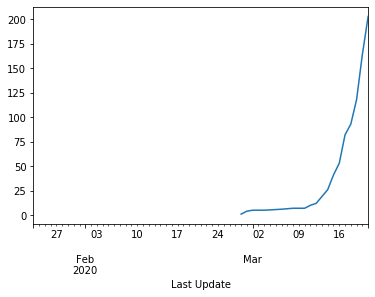

In [35]:
daily_report = mex.index.to_period('D')
mex.groupby(daily_report)['Confirmed'].apply(lambda x: np.mean(x)).plot()